In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

input_path="D:\DataSets\churn_modelling.csv"
#  A way to tackle the various represents of missing values other than "NA" is to add values to a list
missing_values = ["n/a", "na", "--"]
frame=pd.read_csv(input_path,index_col=None,na_values = missing_values)
frame.rename(columns={"EstimatedSalary":"EstSalary"},inplace=True)
df=frame[frame.columns.to_list()[3:]]

# Missing values check
df.isnull().sum()
df.head(4)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0


In [2]:

# sns.pairplot(dataFrame)
# plt.show(sns)
# df.info()

#Convert Gender to 0 or 1 value
# df=df.copy()


# df['Gender'] = df['Gender'].apply(lambda x: 1 if x=='Female' else 0)
df.Gender = np.where(df.Gender =="Male", 1,0)
df.head()



C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [3]:

corr=df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstSalary,Exited
CreditScore,1,-0.0029,-0.004,0.00084,0.0063,0.012,-0.0055,0.026,-0.0014,-0.027
Gender,-0.0029,1,-0.028,0.015,0.012,-0.022,0.0058,0.023,-0.0081,-0.11
Age,-0.004,-0.028,1,-0.01,0.028,-0.031,-0.012,0.085,-0.0072,0.29
Tenure,0.00084,0.015,-0.01,1,-0.012,0.013,0.023,-0.028,0.0078,-0.014
Balance,0.0063,0.012,0.028,-0.012,1,-0.3,-0.015,-0.01,0.013,0.12
NumOfProducts,0.012,-0.022,-0.031,0.013,-0.3,1,0.0032,0.0096,0.014,-0.048
HasCrCard,-0.0055,0.0058,-0.012,0.023,-0.015,0.0032,1,-0.012,-0.0099,-0.0071
IsActiveMember,0.026,0.023,0.085,-0.028,-0.01,0.0096,-0.012,1,-0.011,-0.16
EstSalary,-0.0014,-0.0081,-0.0072,0.0078,0.013,0.014,-0.0099,-0.011,1,0.012
Exited,-0.027,-0.11,0.29,-0.014,0.12,-0.048,-0.0071,-0.16,0.012,1


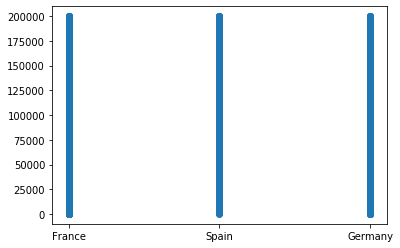

In [4]:
x=df.Geography
y=df.EstSalary
plt.xlabel="Geography"
plt.ylabel="Salary"
plt.scatter(x,y)
plt.show()

In [5]:
df.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [6]:
F, p = stats.f_oneway(df[df.Geography=='France'].EstSalary,
                      df[df.Geography=='Germany'].EstSalary,
                      df[df.Geography=='Spain'].EstSalary)
print(F,p)

0.5827609114534064 0.5583736355799094


In [7]:
# Method 1 to use groupby using dataframe mean function
grouped=df.groupby('Geography').mean()

# Method 2 grouped_data['rt'].aggregate(np.mean).reset_index()

grouped

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstSalary,Exited
Geography,,,,,,,,,,
France,649.668329,0.549063,38.511767,5.004587,62092.636516,1.530913,0.706621,0.516753,99899.180814,0.161548
Germany,651.453567,0.524512,39.771622,5.009964,119730.116134,1.519729,0.713830,0.497409,101113.435102,0.324432
Spain,651.333872,0.560355,38.890997,5.032297,61818.147763,1.539362,0.694792,0.529673,99440.572281,0.166734


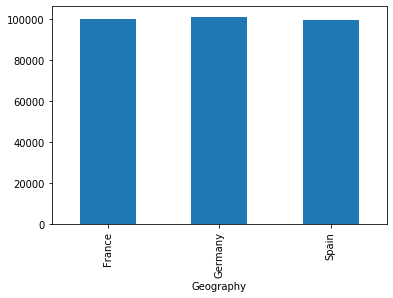

In [8]:
grouped.EstSalary.plot(kind='bar')

In [ ]:
# Understand the significance of F and p values to proceed further to check the estimated salary variation between geography